In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
ipl_df = pd.read_csv('csv_data/IPL_Matches_2008_2022.csv')
print(ipl_df.shape)
ipl_df.head()

(950, 20)


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [3]:
ipl_df['Team2'].value_counts()

Mumbai Indians                 119
Kolkata Knight Riders          118
Rajasthan Royals               103
Royal Challengers Bangalore    100
Kings XI Punjab                 98
Chennai Super Kings             97
Sunrisers Hyderabad             83
Delhi Daredevils                76
Deccan Chargers                 36
Delhi Capitals                  34
Pune Warriors                   23
Gujarat Lions                   14
Punjab Kings                    10
Gujarat Titans                   9
Rising Pune Supergiant           9
Rising Pune Supergiants          7
Lucknow Super Giants             7
Kochi Tuskers Kerala             7
Name: Team2, dtype: int64

# Create a new table showing the following team statistics

![](images/team_stats_ipl.png)

In [4]:
teams = ['Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
         'Royal Challengers Bangalore','Kings XI Punjab',
         'Chennai Super Kings','Sunrisers Hyderabad','Delhi Capitals']                

In [5]:
top8_ipl_teams = ipl_df.loc[(ipl_df['Team1'].isin(teams)) &
                           (ipl_df['Team2'].isin(teams))]
print(top8_ipl_teams.shape)

(577, 20)


In [6]:
teams_dict = {'Mumbai Indians' : "MI", 'Kolkata Knight Riders': "KKR", 
              'Rajasthan Royals': "RR", 'Royal Challengers Bangalore': 'RCB',
              'Kings XI Punjab' : "KXIP", 'Chennai Super Kings' : "CSK",
              'Sunrisers Hyderabad' : "SRH",'Delhi Capitals': "DC"}               

In [7]:
top8_ipl_teams[['Team1', 'Team2', 'TossWinner', 'WinningTeam']] = \
top8_ipl_teams[['Team1', 'Team2', 'TossWinner', 'WinningTeam']].replace(teams_dict)

In [8]:
top8_ipl_teams['Match'] = top8_ipl_teams['Team1'] + " " + "Vs" + \
" " + top8_ipl_teams['Team2']

In [9]:
team_stats_dict = {}
for row in top8_ipl_teams.values:
    teams = row[-1].split('Vs')
    for team in teams:
        team = team.strip()
        if team not in team_stats_dict:
            team_stats_dict[team] = 1
        else:
            team_stats_dict[team] += 1    

In [10]:
team_stats_dict

{'RCB': 170,
 'RR': 150,
 'DC': 56,
 'MI': 176,
 'CSK': 165,
 'SRH': 122,
 'KKR': 172,
 'KXIP': 143}

In [11]:
team_stats_df = top8_ipl_teams['Team1'].value_counts() + \
top8_ipl_teams['Team2'].value_counts()
team_stats_df = team_stats_df.to_frame()


In [12]:
team_stats_df.reset_index(inplace = True)
team_stats_df.columns = ['Teams', 'Match Played']

In [13]:
team_stats_df.head()

,Teams,Match Played
0,CSK,165
1,DC,56
2,KKR,172
3,KXIP,143
4,MI,176


In [14]:
team_win_stats = top8_ipl_teams['WinningTeam'].value_counts().to_frame().reset_index()
team_win_stats.columns = ['Teams', 'Matches Won']
team_win_stats.head()

,Teams,Matches Won
0,MI,103
1,CSK,97
2,KKR,84
3,RCB,74
4,RR,69


## Merging team stats and team_win stats dataset

In [15]:
team_stats = pd.merge(team_stats_df, team_win_stats,
                     how = 'inner', on = "Teams")
team_stats.head()

,Teams,Match Played,Matches Won
0,CSK,165,97
1,DC,56,32
2,KKR,172,84
3,KXIP,143,60
4,MI,176,103


In [16]:
toss_stats = top8_ipl_teams['TossWinner'].value_counts().to_frame().reset_index()
toss_stats.columns = ['Teams', 'Tosses Won']
toss_stats.head()

,Teams,Tosses Won
0,MI,100
1,CSK,86
2,KKR,83
3,RR,79
4,RCB,76


## Merging toss_stats with team_stats datasets

In [17]:
team_stats = pd.merge(team_stats, toss_stats, how = 'inner', 
                     on = 'Teams')
team_stats.head()

,Teams,Match Played,Matches Won,Tosses Won
0,CSK,165,97,86
1,DC,56,32,32
2,KKR,172,84,83
3,KXIP,143,60,63
4,MI,176,103,100


In [18]:
top8_ipl_teams.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'Match'],
      dtype='object')

In [19]:
top8_ipl_teams['WonBy'].value_counts()

Wickets      310
Runs         253
SuperOver     12
NoResults      2
Name: WonBy, dtype: int64

In [20]:
# top8_ipl_teams.loc[top8_ipl_teams['WonBy'] == "NoResults"]

In [21]:
# top8_ipl_teams.groupby('WinningTeam')['WonBy'].value_counts(dropna = False).to_frame()

In [22]:
win_stats = top8_ipl_teams.groupby('WinningTeam')['WonBy'].value_counts(dropna = False).to_frame()
win_stats.columns = ['WinCount']
win_stats.reset_index(inplace = True)
win_stats.head()

,WinningTeam,WonBy,WinCount
0,CSK,Wickets,53
1,CSK,Runs,44
2,DC,Wickets,17
3,DC,Runs,12
4,DC,SuperOver,3


In [23]:
win_stats['WonBy'].value_counts()

Wickets      8
Runs         8
SuperOver    7
Name: WonBy, dtype: int64

In [24]:
final_win_stats = pd.pivot_table(data = win_stats, index = "WinningTeam",
                                columns = "WonBy", values = "WinCount")
final_win_stats.head()

WonBy,Runs,SuperOver,Wickets
WinningTeam,,,
CSK,44.0,NaN,53.0
DC,12.0,3.0,17.0
KKR,31.0,1.0,52.0
KXIP,31.0,3.0,26.0
MI,48.0,1.0,54.0


In [25]:
final_win_stats = final_win_stats.fillna(0)
final_win_stats.head()

WonBy,Runs,SuperOver,Wickets
WinningTeam,,,
CSK,44.0,0.0,53.0
DC,12.0,3.0,17.0
KKR,31.0,1.0,52.0
KXIP,31.0,3.0,26.0
MI,48.0,1.0,54.0


In [26]:
final_win_stats[['Runs', 'SuperOver',
                 'Wickets']] = final_win_stats[['Runs', 'SuperOver',
                                                'Wickets']].astype('int')

final_win_stats = final_win_stats.reset_index()
final_win_stats.head()
                                             

WonBy,WinningTeam,Runs,SuperOver,Wickets
0,CSK,44,0,53
1,DC,12,3,17
2,KKR,31,1,52
3,KXIP,31,3,26
4,MI,48,1,54


In [27]:
final_win_stats = final_win_stats.rename_axis(None, axis = 1)
final_win_stats.head()

,WinningTeam,Runs,SuperOver,Wickets
0,CSK,44,0,53
1,DC,12,3,17
2,KKR,31,1,52
3,KXIP,31,3,26
4,MI,48,1,54


In [28]:
final_win_stats.columns = ['Teams', 'Win Batting First', 'Win In Super Over',
                          'Win Batting Second']
final_win_stats.head()

,Teams,Win Batting First,Win In Super Over,Win Batting Second
0,CSK,44,0,53
1,DC,12,3,17
2,KKR,31,1,52
3,KXIP,31,3,26
4,MI,48,1,54


In [29]:
team_stats = pd.merge(team_stats, final_win_stats, on = 'Teams',
                     how = 'inner')
team_stats.head()

,Teams,Match Played,Matches Won,Tosses Won,Win Batting First,Win In Super Over,Win Batting Second
0,CSK,165,97,86,44,0,53
1,DC,56,32,32,12,3,17
2,KKR,172,84,83,31,1,52
3,KXIP,143,60,63,31,3,26
4,MI,176,103,100,48,1,54


In [30]:
top8_ipl_teams.loc[top8_ipl_teams['WonBy'] == "NoResults"][['Team1', 'Team2']].value_counts()

Team1  Team2
RCB    RR       2
dtype: int64

In [31]:
team_stats['Matches Drawn'] = 0
team_stats.loc[team_stats['Teams'].isin(['RCB', 'RR']), 'Matches Drawn'] = 2

In [32]:
team_stats['Matches Lost'] = team_stats['Match Played'] - \
team_stats['Matches Won'] - team_stats['Matches Drawn']


In [33]:
print(team_stats.shape)
team_stats.head()

(8, 9)


,Teams,Match Played,Matches Won,Tosses Won,Win Batting First,Win In Super Over,Win Batting Second,Matches Drawn,Matches Lost
0,CSK,165,97,86,44,0,53,0,68
1,DC,56,32,32,12,3,17,0,24
2,KKR,172,84,83,31,1,52,0,88
3,KXIP,143,60,63,31,3,26,0,83
4,MI,176,103,100,48,1,54,0,73


In [34]:
team_stats.to_csv('csv_data/ipl2022_team_stats.csv', index = False)

# Perform an EDA to answer the following questions:

<li><b>Which team has won most number of matches ?</b></li>
<li><b>Which player has won the player of the match maximum number of times?</b></li>
<li><b>Which team has won most player of the match awards?</b></li>
<li><b>Which venue is the most popular venue of the IPL?</b></li>
<li><b>How many matches are won batting first?</b></li>
<li><b>How many matches are won batting second?</b></li>


In [35]:
team_stats

,Teams,Match Played,Matches Won,Tosses Won,Win Batting First,Win In Super Over,Win Batting Second,Matches Drawn,Matches Lost
0,CSK,165,97,86,44,0,53,0,68
1,DC,56,32,32,12,3,17,0,24
2,KKR,172,84,83,31,1,52,0,88
3,KXIP,143,60,63,31,3,26,0,83
4,MI,176,103,100,48,1,54,0,73
5,RCB,170,74,76,30,1,43,2,94
6,RR,150,69,79,27,2,40,2,79
7,SRH,122,56,58,30,1,25,0,66


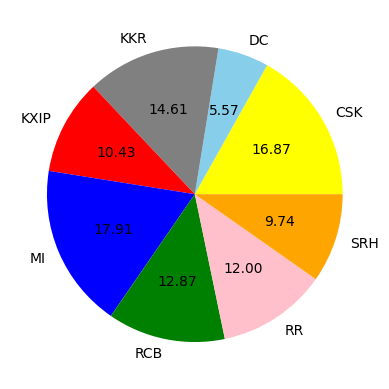

In [36]:
plt.pie(team_stats['Matches Won'], labels = team_stats['Teams'],
       colors = ['yellow', 'skyblue', 'grey', 'red', 'blue',
                'green','pink', 'orange'], autopct = "%.2f"
       )
plt.show()

In [37]:
def univariate_barplot(df, title, xlabel, ylabel, figsize, colors):

    plt.figure(figsize=figsize)
    columns = list(df.columns)
    ax = sns.barplot(x=columns[0],y=columns[1],data = df, palette = colors)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for value in ax.patches:
        ax.text(value.get_x(), value.get_height() + 0.5, value.get_height())
    plt.show()

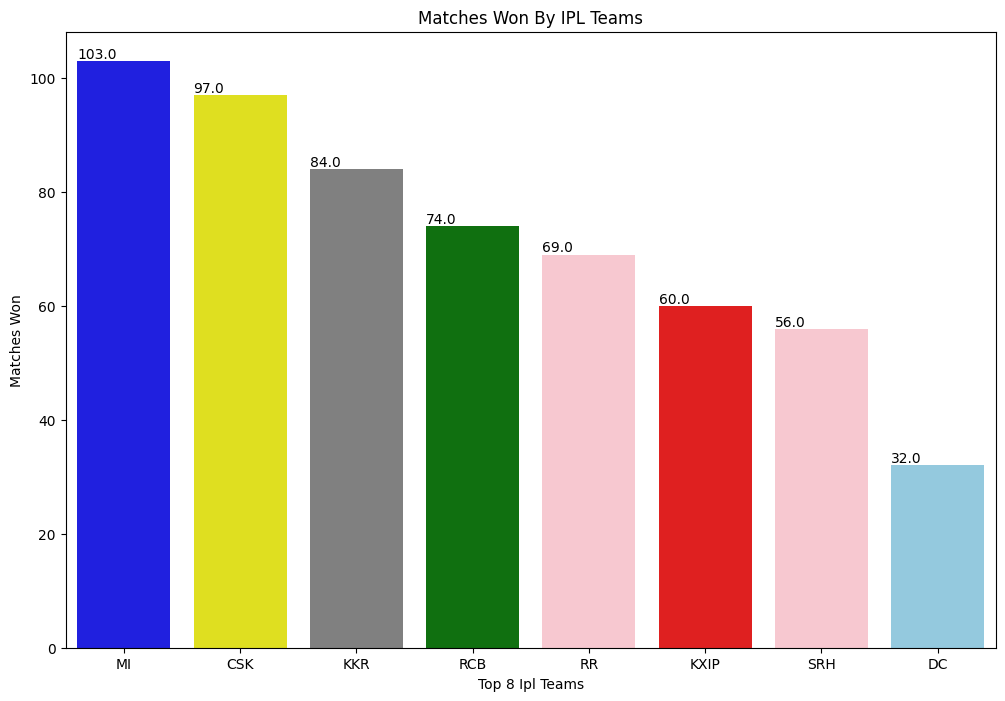

In [38]:
colors = ['blue', 'yellow', 'gray', 'green', 'pink','red',
                'pink', 'skyblue']
univariate_barplot(team_stats[['Teams', 'Matches Won']].sort_values('Matches Won',
                                                                    ascending = False),
                   'Matches Won By IPL Teams',
                  xlabel = 'Top 8 Ipl Teams', ylabel = "Matches Won", 
                  figsize = (12,8), colors = colors)

In [39]:
ipl_pom = top8_ipl_teams['Player_of_Match'].value_counts().to_frame().reset_index()
ipl_pom.columns = ['Player', 'Frequency']
top10_ipl_pom = ipl_pom[:10]
top10_ipl_pom.head()

,Player,Frequency
0,CH Gayle,16
1,AB de Villiers,14
2,SR Watson,12
3,RG Sharma,12
4,KA Pollard,12


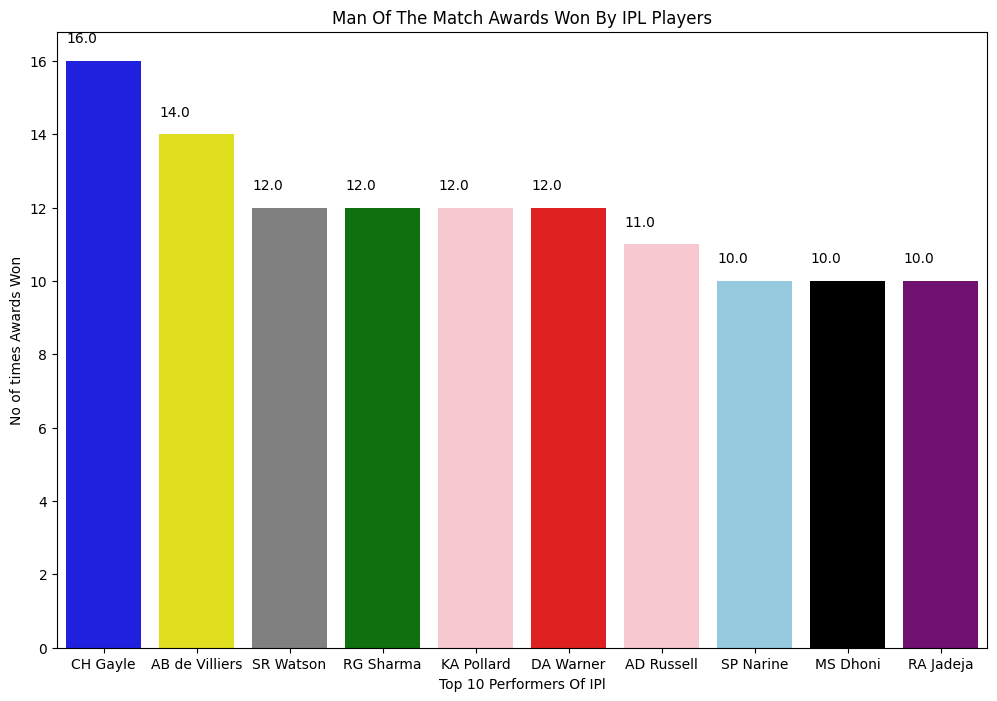

In [40]:
colors = ['blue', 'yellow', 'gray', 'green', 'pink','red',
                'pink', 'skyblue', 'black', 'purple']
univariate_barplot(top10_ipl_pom,
                   'Man Of The Match Awards Won By IPL Players',
                  xlabel = 'Top 10 Performers Of IPl', 
                   ylabel = "No of times Awards Won", 
                  figsize = (12,8), colors = colors)

### How many matches were won batting first?

In [41]:
team_stats['Win Batting First'].sum()

253

<li><b>253 matches were won batting first.</b></li>

### How many matches were won batting second?

In [42]:
team_stats['Win Batting Second'].sum()

310

<li><b>310 matches were won while chasing the scores.</b></li>

In [43]:
top8_ipl_teams['Venue'].value_counts()

Eden Gardens                                            60
Wankhede Stadium                                        54
M Chinnaswamy Stadium                                   46
Dubai International Cricket Stadium                     41
Sawai Mansingh Stadium                                  36
MA Chidambaram Stadium, Chepauk                         33
Sheikh Zayed Stadium                                    28
Punjab Cricket Association Stadium, Mohali              27
Sharjah Cricket Stadium                                 24
Rajiv Gandhi International Stadium, Uppal               22
Wankhede Stadium, Mumbai                                17
Rajiv Gandhi International Stadium                      14
M.Chinnaswamy Stadium                                   13
Kingsmead                                               10
Punjab Cricket Association IS Bindra Stadium             9
MA Chidambaram Stadium                                   9
Sardar Patel Stadium, Motera                            

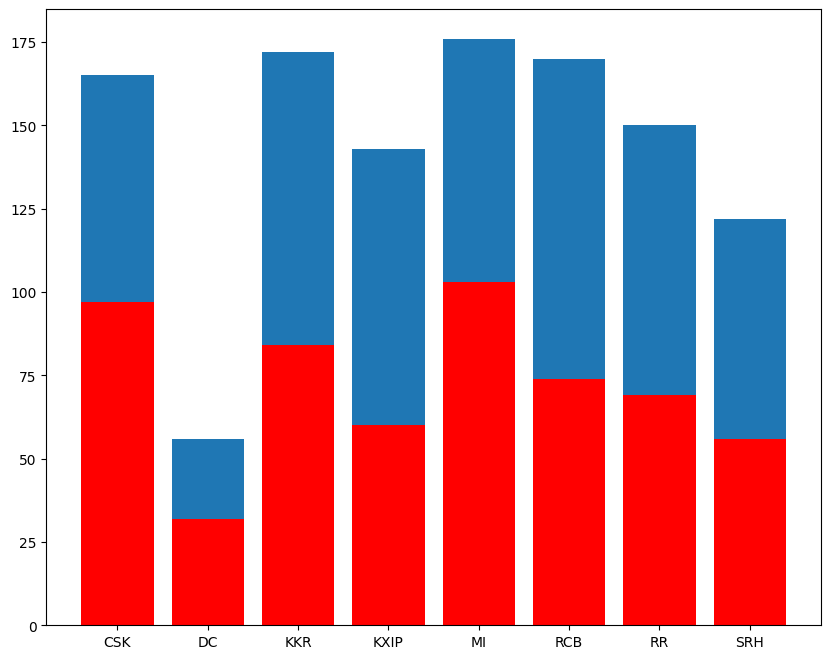

In [44]:
plt.figure(figsize = (10, 8))
plt.bar(team_stats['Teams'], team_stats['Match Played'])
plt.bar(team_stats['Teams'], team_stats['Matches Won'], color = 'red')
plt.show()

## Hypothesis Testing: (Inferential Statistics)

### Chisquare Test

<li>Chi-square test is a statistical test for categorical data.</li>
<li>It is used to determine whether your data are significantly different from what you expected.</li>
<li>There are two types of Pearson’s chi-square tests:</li>
<ol>
    <li>The chi-square goodness of fit test is used to test whether the frequency distribution of a categorical variable is different from your expectations.</li>
    <li>The chi-square test of independence is used to test whether two categorical variables are related to each other.</li>
</ol>
<li>Chi-square is often written as Χ2 and is pronounced “kai-square” (rhymes with “eye-square”). It is also called chi-squared.</li>

### Chi-square formula:

![](images/chi_square_test.png)

<li>We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:</li>
<ol>
    <li>If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.</li>
    <li>If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.</li>
</ol>      
<li>The degrees of freedom for the chi-squared distribution is calculated based on the size of the contingency table as:</li>
<code>
    degrees of freedom = (rows - 1) * (cols - 1)
</code>
<li>In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:</li>
<ol>
    <li>If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.</li>
    <li>If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.</li>
<li<For the test to be effective, at least five observations are required in each cell of the contingency table.</li>


<li>For using chi-square test, you can use the following code:</li>
<code>
    import scipy.stats as stats
    stats.chi2_contingency(observed = observed_contingency_table)
</code>


### Is Winning a toss a decider IN IPl Games

In [49]:
toss_decider = pd.crosstab(top8_ipl_teams['TossWinner'],
                              top8_ipl_teams['WinningTeam'])
toss_decider.head()

WinningTeam,CSK,DC,KKR,KXIP,MI,RCB,RR,SRH
TossWinner,,,,,,,,
CSK,54,2,4,5,7,6,6,2
DC,3,18,1,2,3,2,1,2
KKR,9,2,43,6,10,3,5,5
KXIP,4,1,8,22,7,7,6,8
MI,5,2,4,10,60,8,5,6


In [54]:
import scipy.stats as stats
# alpha = level of significance
alpha = 0.05
H0 = "H0: There is no relationship between winning toss and winning games."
H1 = "H1: Winning a toss is an advantage in winning games"
test_stats = stats.chi2_contingency(observed = toss_decider)
p_value = test_stats[1]
if p_value <= alpha:
    print(H1)
else:
    print(H0)


H1: Winning a toss is an advantage in winning games


In [61]:
removed_match = ['Elimination Final', 'Semi Final', 'Qualifier',
                'Qualifier 1', 'Eliminator', 'Qualifier 2', 'Final']

In [65]:
league_matches = top8_ipl_teams.loc[~top8_ipl_teams['MatchNumber'].isin(removed_match)]
league_matches

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Match
5,1304115,Mumbai,2022-05-21,2022,69,DC,MI,"Wankhede Stadium, Mumbai",MI,field,...,MI,Wickets,5.0,NaN,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma,DC Vs MI
6,1304114,Mumbai,2022-05-20,2022,68,CSK,RR,"Brabourne Stadium, Mumbai",CSK,bat,...,RR,Wickets,5.0,NaN,R Ashwin,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagad...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,NA Patwardhan,CSK Vs RR
9,1304111,Mumbai,2022-05-17,2022,65,SRH,MI,"Wankhede Stadium, Mumbai",MI,field,...,SRH,Runs,3.0,NaN,RA Tripathi,"['Abhishek Sharma', 'PK Garg', 'RA Tripathi', ...","['RG Sharma', 'Ishan Kishan', 'DR Sams', 'Tila...",CB Gaffaney,N Pandit,SRH Vs MI
13,1304107,Pune,2022-05-14,2022,61,KKR,SRH,"Maharashtra Cricket Association Stadium, Pune",KKR,bat,...,KKR,Runs,54.0,NaN,AD Russell,"['VR Iyer', 'AM Rahane', 'N Rana', 'SS Iyer', ...","['Abhishek Sharma', 'KS Williamson', 'RA Tripa...",AK Chaudhary,KN Ananthapadmanabhan,KKR Vs SRH
15,1304105,Mumbai,2022-05-12,2022,59,CSK,MI,"Wankhede Stadium, Mumbai",MI,field,...,MI,Wickets,5.0,NaN,DR Sams,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'RV Utha...","['Ishan Kishan', 'RG Sharma', 'DR Sams', 'Tila...",Chirra Ravikanthreddy,CB Gaffaney,CSK Vs MI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,335989,Chennai,2008-04-23,2007/08,8,CSK,MI,"MA Chidambaram Stadium, Chepauk",MI,field,...,CSK,Runs,6.0,NaN,ML Hayden,"['PA Patel', 'ML Hayden', 'MEK Hussey', 'SK Ra...","['L Ronchi', 'ST Jayasuriya', 'RV Uthappa', 'S...",DJ Harper,GA Pratapkumar,CSK Vs MI
944,335987,Jaipur,2008-04-21,2007/08,6,RR,KXIP,Sawai Mansingh Stadium,KXIP,bat,...,RR,Wickets,6.0,NaN,SR Watson,"['M Kaif', 'Kamran Akmal', 'YK Pathan', 'SR Wa...","['K Goel', 'JR Hopes', 'KC Sangakkara', 'DPMD ...",Aleem Dar,RB Tiffin,RR Vs KXIP
946,335985,Mumbai,2008-04-20,2007/08,5,MI,RCB,Wankhede Stadium,MI,bat,...,RCB,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,MI Vs RCB
948,335983,Chandigarh,2008-04-19,2007/08,2,KXIP,CSK,"Punjab Cricket Association Stadium, Mohali",CSK,bat,...,CSK,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,KXIP Vs CSK


In [66]:
home_decider = pd.crosstab(league_matches['Team1'], league_matches['WinningTeam'])
home_decider.head()

WinningTeam,CSK,DC,KKR,KXIP,MI,RCB,RR,SRH
Team1,,,,,,,,
CSK,43,3,4,4,9,2,5,3
DC,1,13,1,1,3,1,1,1
KKR,9,4,41,5,10,5,5,3
KXIP,7,1,7,30,8,6,7,4
MI,5,3,4,7,44,6,7,4


In [68]:
# Null Hypothesis:

H0 = "H0: Playing a game in home is not an advantage for Home Team."
# Alternative Hypothesis
H1 = "H1: Playing a game in home is an advantage for the Heam team"
alpha = 0.05
chisquare_test = stats.chi2_contingency(observed = home_decider)
p_value = chisquare_test[1]
if p_value <= alpha:
    print(H1)
else:
    print(H0)

H1: Playing a game in home is an advantage for the Heam team
